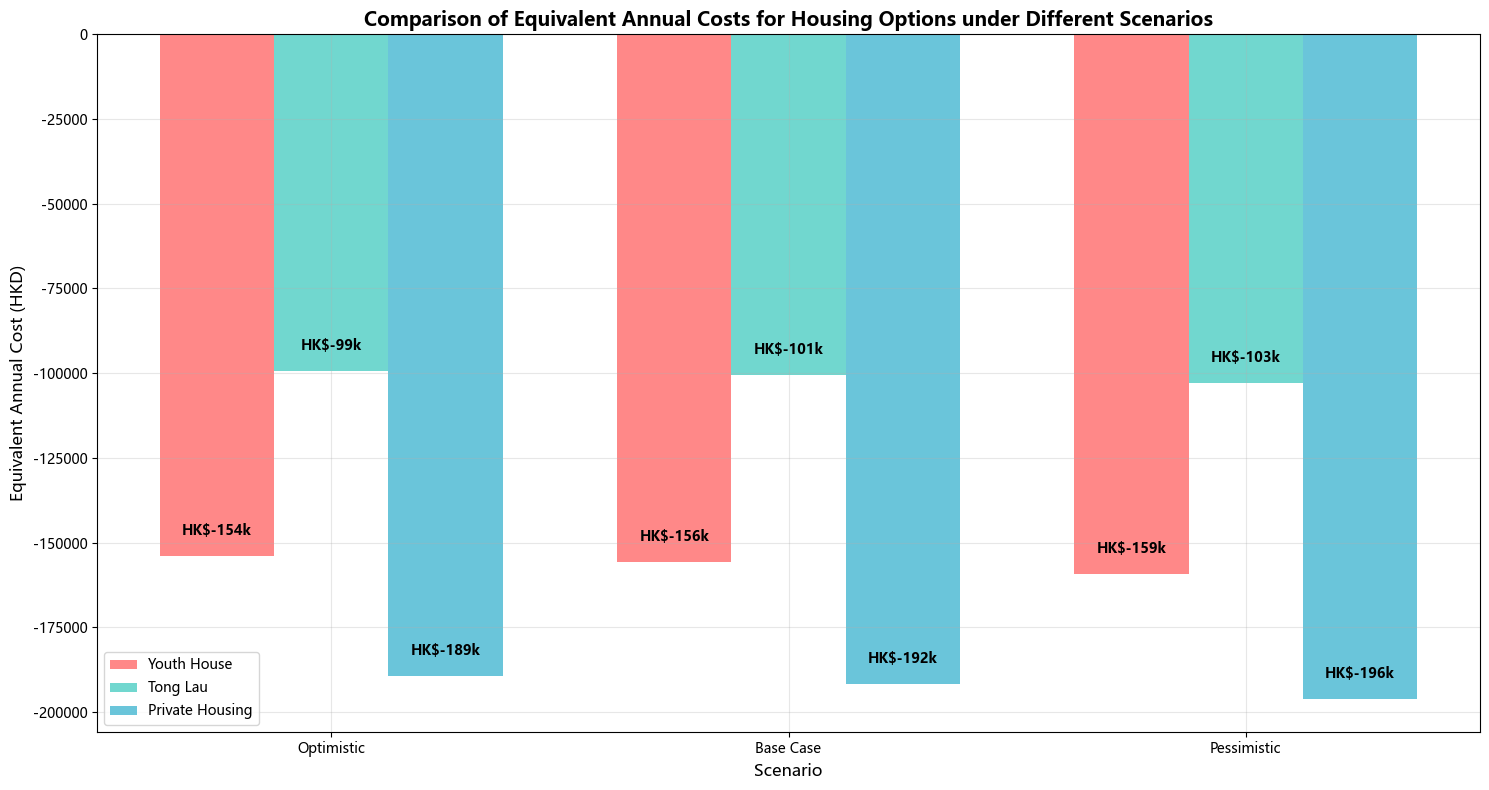

Scenario Analysis Results (EAC):
                 Optimistic  Base Case  Pessimistic
Youth House      -154050.16 -155817.43   -159270.26
Tong Lau          -99267.71 -100588.78   -102772.10
Private Housing  -189307.64 -191755.84   -196006.76


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base data
discount_rate = 0.0425

# Define cash flow calculation function
def calculate_npv(cash_flows, dr):
    npv = 0
    for year, cf in enumerate(cash_flows):
        npv += cf / ((1 + dr) ** year)
    return npv

def calculate_eac(npv, years, dr):
    annuity_factor = (1 - (1 + dr) ** -years) / dr
    return npv / annuity_factor

# Basic Cash Flow
youth_house_cf = [0, -155640, -155731.2, -160407.4, -160501.4, -160596.8]
tong_lau_cf = [-35416, -92400, -92491.2, -99174.14064, -97939.53979, -75120]
private_housing_cf = [-51185, -180000, -180091.2, -202521.79, -198112.78, -150249.45]

# Context Analysis
scenarios = {
    'Optimistic': {'rent_growth': -0.01, 'inflation': 0.01, 'discount_rate': 0.03},
    'Base Case': {'rent_growth': 0.00, 'inflation': 0.0152, 'discount_rate': 0.0425},  # This is correct
    'Pessimistic': {'rent_growth': 0.02, 'inflation': 0.02, 'discount_rate': 0.05}
}

def adjust_cash_flows(base_cf, scenario_params, case_name):
    """Adjust cash flows based on scenario parameters"""
    rent_growth = scenario_params['rent_growth']
    inflation = scenario_params['inflation']
    
    adjusted_cf = base_cf.copy()
    
    if case_name == "Youth House":
        # Adjust rent for years 3-5 (considering rent growth)
        for year in [3, 4, 5]:
            growth_factor = (1 + rent_growth) ** (year - 2)
            rent_component = -149640 * growth_factor
            utility_component = -6000 * (1 + inflation) ** (year - 1)
            adjusted_cf[year] = rent_component + utility_component
    
    elif case_name == "Tong Lau":
        # Adjust rent for years 3-5
        for year in [3, 4, 5]:
            growth_factor = (1 + rent_growth) ** (year - 2)
            rent_component = -86400 * growth_factor
            utility_component = -6000 * (1 + inflation) ** (year - 1)
            adjusted_cf[year] = rent_component + utility_component
    
    elif case_name == "Private Housing":
        # Adjust rent for years 3-5
        for year in [3, 4, 5]:
            growth_factor = (1 + rent_growth) ** (year - 2)
            rent_component = -174000 * growth_factor
            utility_component = -6000 * (1 + inflation) ** (year - 1)
            adjusted_cf[year] = rent_component + utility_component
    
    return adjusted_cf

# Calculate EAC for each scenario
results = {}
for scenario_name, params in scenarios.items():
    scenario_results = {}
    
    for case_name, base_cf in [("Youth House", youth_house_cf), 
                              ("Tong Lau", tong_lau_cf), 
                              ("Private Housing", private_housing_cf)]:
        
        adjusted_cf = adjust_cash_flows(base_cf, params, case_name)
        npv = calculate_npv(adjusted_cf, params['discount_rate'])
        eac = calculate_eac(npv, 5, params['discount_rate'])
        scenario_results[case_name] = eac
    
    results[scenario_name] = scenario_results

# Scenario analysis visualization - only show this one chart
scenario_df = pd.DataFrame(results)
fig, ax = plt.subplots(figsize=(15, 8))
x = np.arange(len(scenario_df.columns))
width = 0.25

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']

for i, (case, values) in enumerate(scenario_df.iterrows()):
    ax.bar(x + i*width, values, width, label=case, alpha=0.8, color=colors[i])

ax.set_xlabel('Scenario', fontsize=12)
ax.set_ylabel('Equivalent Annual Cost (HKD)', fontsize=12)
ax.set_title('Comparison of Equivalent Annual Costs for Housing Options under Different Scenarios', fontsize=14, fontweight='bold')
ax.set_xticks(x + width)
ax.set_xticklabels(scenario_df.columns)
ax.legend()
ax.grid(True, alpha=0.3)

# Add value labels
for i, (scenario, values) in enumerate(scenario_df.items()):
    for j, value in enumerate(values):
        ax.text(i + j*width, value + 5000, f'HK${value/1000:.0f}k', 
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Output numerical results
print("Scenario Analysis Results (EAC):")
print("=" * 50)
print(pd.DataFrame(results).round(2))

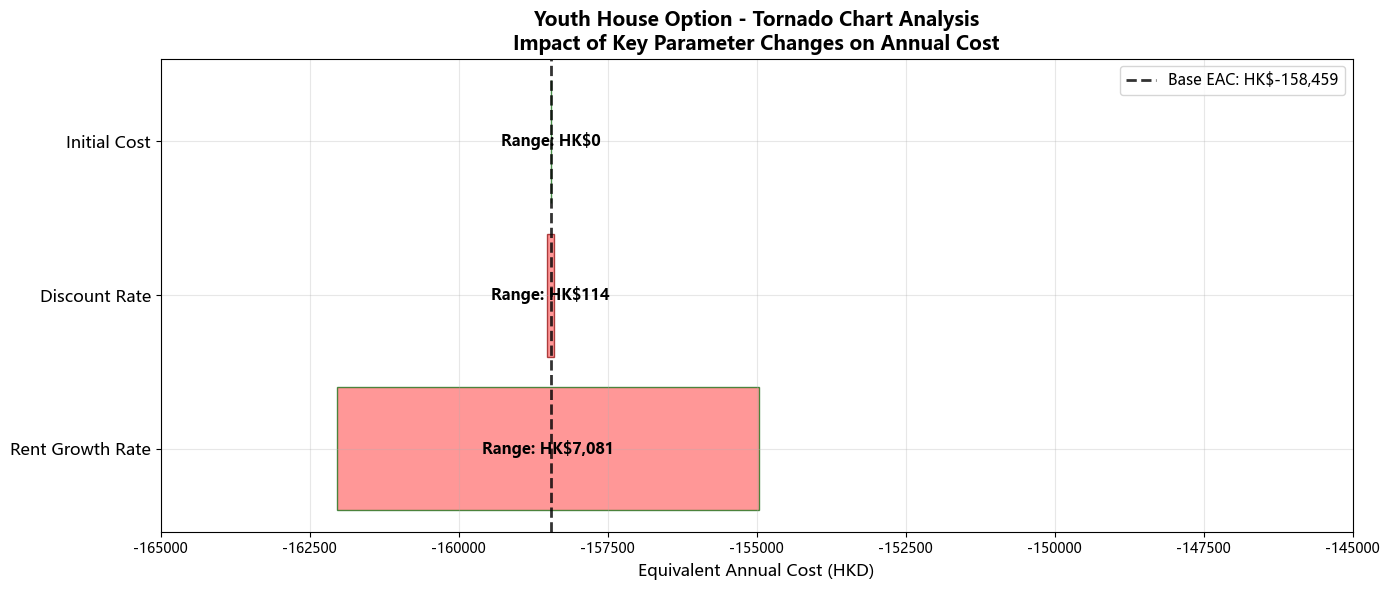

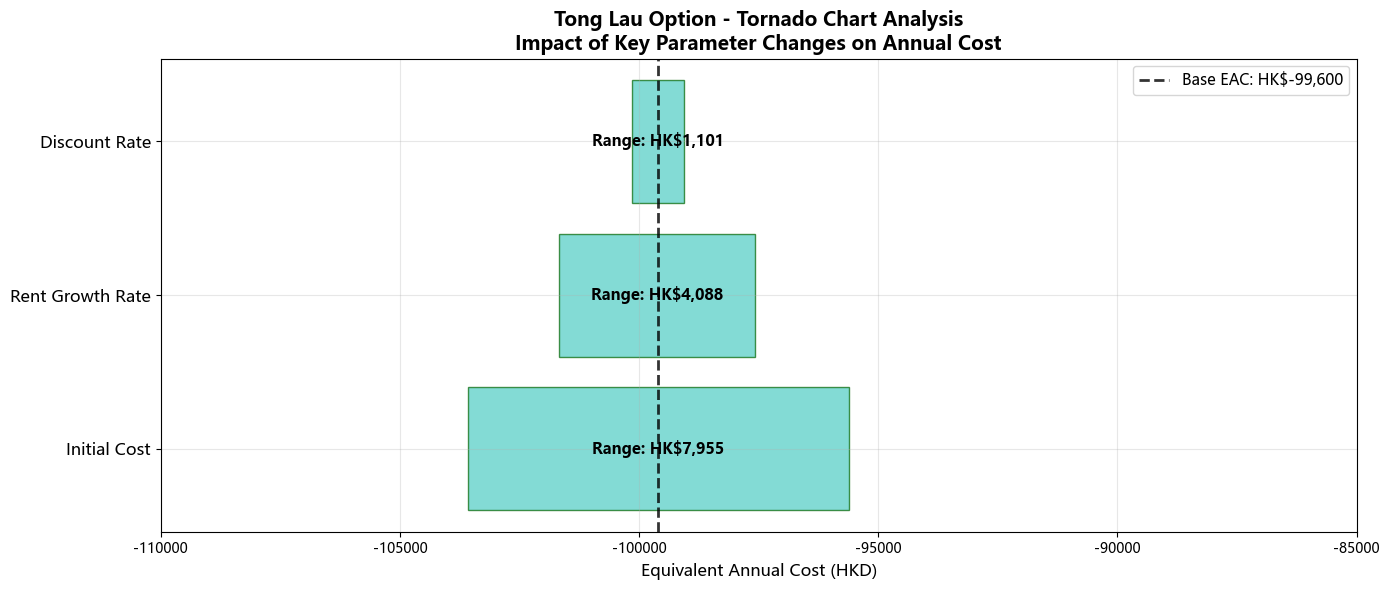

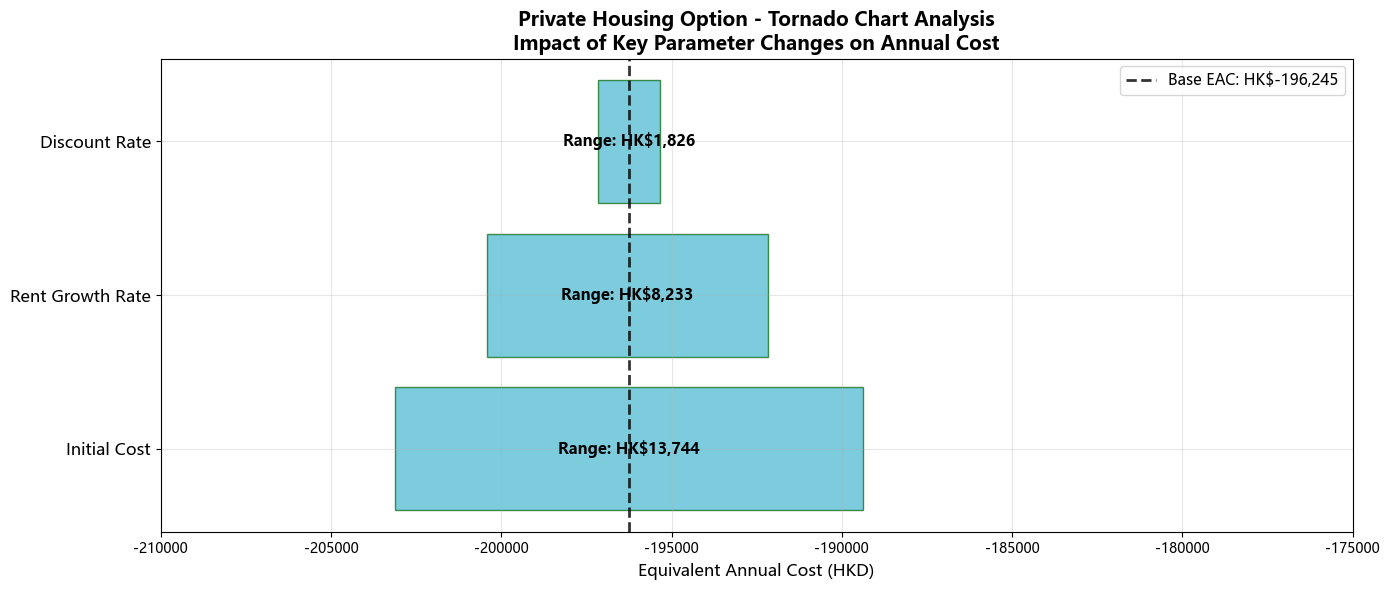

Tornado Analysis Detailed Results for Each Option:

Youth House Option:
------------------------------------------------------------
  Rent Growth Rate: HK$-154,965 (-2.2%) to HK$-162,045 (+2.3%) | Range: HK$7,081
  Discount Rate  : HK$-158,517 (+0.0%) to HK$-158,403 (-0.0%) | Range: HK$114
  Initial Cost   : HK$-158,459 (-0.0%) to HK$-158,459 (-0.0%) | Range: HK$0
  Base EAC: HK$-158,459

Tong Lau Option:
------------------------------------------------------------
  Initial Cost   : HK$ -95,622 (-4.0%) to HK$-103,578 (+4.0%) | Range: HK$7,955
  Rent Growth Rate: HK$ -97,582 (-2.0%) to HK$-101,670 (+2.1%) | Range: HK$4,088
  Discount Rate  : HK$ -99,052 (-0.6%) to HK$-100,153 (+0.6%) | Range: HK$1,101
  Base EAC: HK$-99,600

Private Housing Option:
------------------------------------------------------------
  Initial Cost   : HK$-189,373 (-3.5%) to HK$-203,117 (+3.5%) | Range: HK$13,744
  Rent Growth Rate: HK$-192,182 (-2.1%) to HK$-200,415 (+2.1%) | Range: HK$8,233
  Discount Rate  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Base data
discount_rate = 0.04

# Define cash flow calculation function
def calculate_npv(cash_flows, dr):
    npv = 0
    for year, cf in enumerate(cash_flows):
        npv += cf / ((1 + dr) ** year)
    return npv

def calculate_eac(npv, years, dr):
    annuity_factor = (1 - (1 + dr) ** -years) / dr
    return npv / annuity_factor

# Base case cash flows
youth_house_cf = [0, -155640, -155731, -160407, -160501, -160596]
tong_lau_cf = [-35416, -92400, -92491, -99174, -97939., -75119]
private_housing_cf = [-61185, -180000, -180091, -202522, -198112, -150249]

# Base initial costs for each option
base_initial_costs = {
    "Youth House": 0,
    "Tong Lau": 35416,
    "Private Housing": 61185
}

# Tornado graph analysis function
def tornado_analysis_updated(base_case, base_dr, base_rent_growth, base_initial_cost, case_name):
    """Updated tornado chart analysis including initial cost"""
    parameters = ['Discount Rate', 'Rent Growth Rate', 'Initial Cost']
    variations = {
        'Discount Rate': (-0.02, 0.02),
        'Rent Growth Rate': (-0.02, 0.02), 
        'Initial Cost': (-0.5, 0.5)  # -50% to +50% variation
    }
    
    # Calculate the basic EAC
    base_npv = calculate_npv(base_case, base_dr)
    base_eac = calculate_eac(base_npv, 5, base_dr)
    
    results = {}
    
    for param in parameters:
        low_var, high_var = variations[param]
        
        if param == 'Discount Rate':
            # Low scenario
            low_dr = base_dr + low_var
            low_npv = calculate_npv(base_case, low_dr)
            low_eac = calculate_eac(low_npv, 5, low_dr)
            
            # High Situation
            high_dr = base_dr + high_var
            high_npv = calculate_npv(base_case, high_dr)
            high_eac = calculate_eac(high_npv, 5, high_dr)
            
        elif param == 'Rent Growth Rate':
            # Low scenario
            low_cf = base_case.copy()
            for year in [3, 4, 5]:
                growth_factor = (1 + base_rent_growth + low_var) ** (year - 2)
                if case_name == "Youth House":
                    original_rent = -149640
                elif case_name == "Tong Lau":
                    original_rent = -86400
                else:  # private housing
                    original_rent = -174000
                
                rent_component = original_rent * growth_factor
                # Keep utility component the same as base case
                base_rent_at_year = original_rent * (1 + base_rent_growth) ** (year - 2)
                utility_component = base_case[year] - base_rent_at_year
                low_cf[year] = rent_component + utility_component
            
            low_npv = calculate_npv(low_cf, base_dr)
            low_eac = calculate_eac(low_npv, 5, base_dr)
            
            # High Situation
            high_cf = base_case.copy()
            for year in [3, 4, 5]:
                growth_factor = (1 + base_rent_growth + high_var) ** (year - 2)
                if case_name == "Youth House":
                    original_rent = -149640
                elif case_name == "Tong Lau":
                    original_rent = -86400
                else:  # private housing
                    original_rent = -174000
                
                rent_component = original_rent * growth_factor
                # Keep utility component the same as base case
                base_rent_at_year = original_rent * (1 + base_rent_growth) ** (year - 2)
                utility_component = base_case[year] - base_rent_at_year
                high_cf[year] = rent_component + utility_component
            
            high_npv = calculate_npv(high_cf, base_dr)
            high_eac = calculate_eac(high_npv, 5, base_dr)
            
        else:  # Initial Cost
            # Low scenario (-50%)
            low_cf = base_case.copy()
            low_initial_cost = base_initial_cost * (1 + low_var)  # low_var is -0.5
            low_cf[0] = -low_initial_cost
            
            low_npv = calculate_npv(low_cf, base_dr)
            low_eac = calculate_eac(low_npv, 5, base_dr)
            
            # High scenario (+50%)
            high_cf = base_case.copy()
            high_initial_cost = base_initial_cost * (1 + high_var)  # high_var is +0.5
            high_cf[0] = -high_initial_cost
            
            high_npv = calculate_npv(high_cf, base_dr)
            high_eac = calculate_eac(high_npv, 5, base_dr)
        
        results[param] = {
            'low': low_eac,
            'high': high_eac,
            'range': abs(high_eac - low_eac)
        }
    
    return results, base_eac

# Tornado Analysis for Each Option
cases = {
    "Youth House": youth_house_cf,
    "Tong Lau": tong_lau_cf, 
    "Private Housing": private_housing_cf
}

tornado_results = {}
base_eacs = {}

for case_name, cash_flows in cases.items():
    base_initial_cost = base_initial_costs[case_name]
    tornado_res, base_eac = tornado_analysis_updated(cash_flows, 0.04, 0.03, base_initial_cost, case_name)
    tornado_results[case_name] = tornado_res
    base_eacs[case_name] = base_eac

# Create a separate chart for each option
case_colors = {
    "Youth House": "#FF6B6B",
    "Tong Lau": "#4ECDC4", 
    "Private Housing": "#45B7D1"
}

# Set a specific x-axis range for each case
case_x_ranges = {
    "Youth House": (-165000, -145000),      # Youth House range
    "Tong Lau": (-110000, -85000),          # Tong Lau range  
    "Private Housing": (-210000, -175000)   # Private Housing range
}

# Youth Hostel - First Chart
plt.figure(figsize=(14, 6))
case_name = "Youth House"
tornado_data = tornado_results[case_name]
base_eac = base_eacs[case_name]

sorted_params = sorted(tornado_data.items(), key=lambda x: x[1]['range'], reverse=True)
params = [item[0] for item in sorted_params]
lows = [item[1]['low'] for item in sorted_params]
highs = [item[1]['high'] for item in sorted_params]

y_pos = np.arange(len(params))

# Please use a specific x-axis range for this case.
x_min, x_max = case_x_ranges[case_name]
plt.xlim(x_min, x_max)

for i, (low, high) in enumerate(zip(lows, highs)):
    if low < high:
        plt.barh(y_pos[i], high - low, left=low, color=case_colors[case_name], alpha=0.7, edgecolor='darkred', linewidth=1)
    else:
        plt.barh(y_pos[i], low - high, left=high, color=case_colors[case_name], alpha=0.7, edgecolor='darkgreen', linewidth=1)

plt.axvline(x=base_eac, color='black', linestyle='--', alpha=0.8, linewidth=2, label=f'Base EAC: HK${base_eac:,.0f}')

plt.yticks(y_pos, params, fontsize=12)
plt.xlabel('Equivalent Annual Cost (HKD)', fontsize=12)
plt.title(f'{case_name} Option - Tornado Chart Analysis\nImpact of Key Parameter Changes on Annual Cost', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Added value label - Color changed to black
for i, (param, data) in enumerate(zip(params, sorted_params)):
    low = data[1]['low']
    high = data[1]['high']
    mid_point = (low + high) / 2
    plt.text(mid_point, i, f'Range: HK${data[1]["range"]:,.0f}', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# Tenant Building - Second Chart
plt.figure(figsize=(14, 6))
case_name = "Tong Lau"
tornado_data = tornado_results[case_name]
base_eac = base_eacs[case_name]

sorted_params = sorted(tornado_data.items(), key=lambda x: x[1]['range'], reverse=True)
params = [item[0] for item in sorted_params]
lows = [item[1]['low'] for item in sorted_params]
highs = [item[1]['high'] for item in sorted_params]

y_pos = np.arange(len(params))

# Please use a specific x-axis range for this case.
x_min, x_max = case_x_ranges[case_name]
plt.xlim(x_min, x_max)

for i, (low, high) in enumerate(zip(lows, highs)):
    if low < high:
        plt.barh(y_pos[i], high - low, left=low, color=case_colors[case_name], alpha=0.7, edgecolor='darkred', linewidth=1)
    else:
        plt.barh(y_pos[i], low - high, left=high, color=case_colors[case_name], alpha=0.7, edgecolor='darkgreen', linewidth=1)

plt.axvline(x=base_eac, color='black', linestyle='--', alpha=0.8, linewidth=2, label=f'Base EAC: HK${base_eac:,.0f}')

plt.yticks(y_pos, params, fontsize=12)
plt.xlabel('Equivalent Annual Cost (HKD)', fontsize=12)
plt.title(f'{case_name} Option - Tornado Chart Analysis\nImpact of Key Parameter Changes on Annual Cost', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Added value label - Color changed to black
for i, (param, data) in enumerate(zip(params, sorted_params)):
    low = data[1]['low']
    high = data[1]['high']
    mid_point = (low + high) / 2
    plt.text(mid_point, i, f'Range: HK${data[1]["range"]:,.0f}', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# Private Housing - Third Chart
plt.figure(figsize=(14, 6))
case_name = "Private Housing"
tornado_data = tornado_results[case_name]
base_eac = base_eacs[case_name]

sorted_params = sorted(tornado_data.items(), key=lambda x: x[1]['range'], reverse=True)
params = [item[0] for item in sorted_params]
lows = [item[1]['low'] for item in sorted_params]
highs = [item[1]['high'] for item in sorted_params]

y_pos = np.arange(len(params))

# Please use a specific x-axis range for this case.
x_min, x_max = case_x_ranges[case_name]
plt.xlim(x_min, x_max)

for i, (low, high) in enumerate(zip(lows, highs)):
    if low < high:
        plt.barh(y_pos[i], high - low, left=low, color=case_colors[case_name], alpha=0.7, edgecolor='darkred', linewidth=1)
    else:
        plt.barh(y_pos[i], low - high, left=high, color=case_colors[case_name], alpha=0.7, edgecolor='darkgreen', linewidth=1)

plt.axvline(x=base_eac, color='black', linestyle='--', alpha=0.8, linewidth=2, label=f'Base EAC: HK${base_eac:,.0f}')

plt.yticks(y_pos, params, fontsize=12)
plt.xlabel('Equivalent Annual Cost (HKD)', fontsize=12)
plt.title(f'{case_name} Option - Tornado Chart Analysis\nImpact of Key Parameter Changes on Annual Cost', fontsize=14, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.legend(fontsize=11)

# Added value label - Color changed to black
for i, (param, data) in enumerate(zip(params, sorted_params)):
    low = data[1]['low']
    high = data[1]['high']
    mid_point = (low + high) / 2
    plt.text(mid_point, i, f'Range: HK${data[1]["range"]:,.0f}', 
            ha='center', va='center', fontsize=11, fontweight='bold', color='black')

plt.tight_layout()
plt.show()

# Output detailed numerical results and comparative analysis
print("Tornado Analysis Detailed Results for Each Option:")
print("=" * 80)

for case_name in cases.keys():
    print(f"\n{case_name} Option:")
    print("-" * 60)
    base_eac = base_eacs[case_name]
    sorted_data = sorted(tornado_results[case_name].items(), key=lambda x: x[1]['range'], reverse=True)
    
    for param, data in sorted_data:
        low_pct = (data['low'] - base_eac) / base_eac * 100
        high_pct = (data['high'] - base_eac) / base_eac * 100
        print(f"  {param:<15}: HK${data['low']:>8,.0f} ({low_pct:+.1f}%) to HK${data['high']:>8,.0f} ({high_pct:+.1f}%) | Range: HK${data['range']:,.0f}")
    
    print(f"  Base EAC: HK${base_eac:,.0f}")

# Risk Analysis Summary
print("\n" + "=" * 80)
print("Risk Analysis Summary")
print("=" * 80)

# Calculate the total risk exposure for each option
risk_exposure = {}
for case_name in cases.keys():
    total_range = sum(data['range'] for data in tornado_results[case_name].values())
    risk_exposure[case_name] = total_range

print("\nTotal Risk Exposure for Each Option (Sum of All Parameter Ranges):")
for case_name, exposure in sorted(risk_exposure.items(), key=lambda x: x[1]):
    print(f"  {case_name}: HK${exposure:,.0f}")

# Find the most sensitive parameter
print("\nMost Sensitive Parameter for Each Option:")
for case_name in cases.keys():
    max_range = 0
    most_sensitive_param = ""
    for param, data in tornado_results[case_name].items():
        if data['range'] > max_range:
            max_range = data['range']
            most_sensitive_param = param
    print(f"  {case_name}: {most_sensitive_param} (Range: HK${max_range:,.0f})")

# Initial Cost Comparison
print("\n" + "=" * 80)
print("Initial Cost Comparison")
print("=" * 80)
for case_name, initial_cost in base_initial_costs.items():
    print(f"{case_name}: HK${initial_cost:,.0f}")

# Recommendation Analysis
print("\n" + "=" * 80)
print("Recommendation Analysis")
print("=" * 80)

# Sort by total cost
sorted_by_cost = sorted(base_eacs.items(), key=lambda x: x[1])
print("\nOptions Sorted by Base EAC (Lowest to Highest):")
for case_name, eac in sorted_by_cost:
    print(f"  {case_name}: HK${eac:,.0f}")

# Sort by risk
sorted_by_risk = sorted(risk_exposure.items(), key=lambda x: x[1])
print("\nOptions Sorted by Risk Exposure (Lowest to Highest):")
for case_name, risk in sorted_by_risk:
    print(f"  {case_name}: HK${risk:,.0f}")


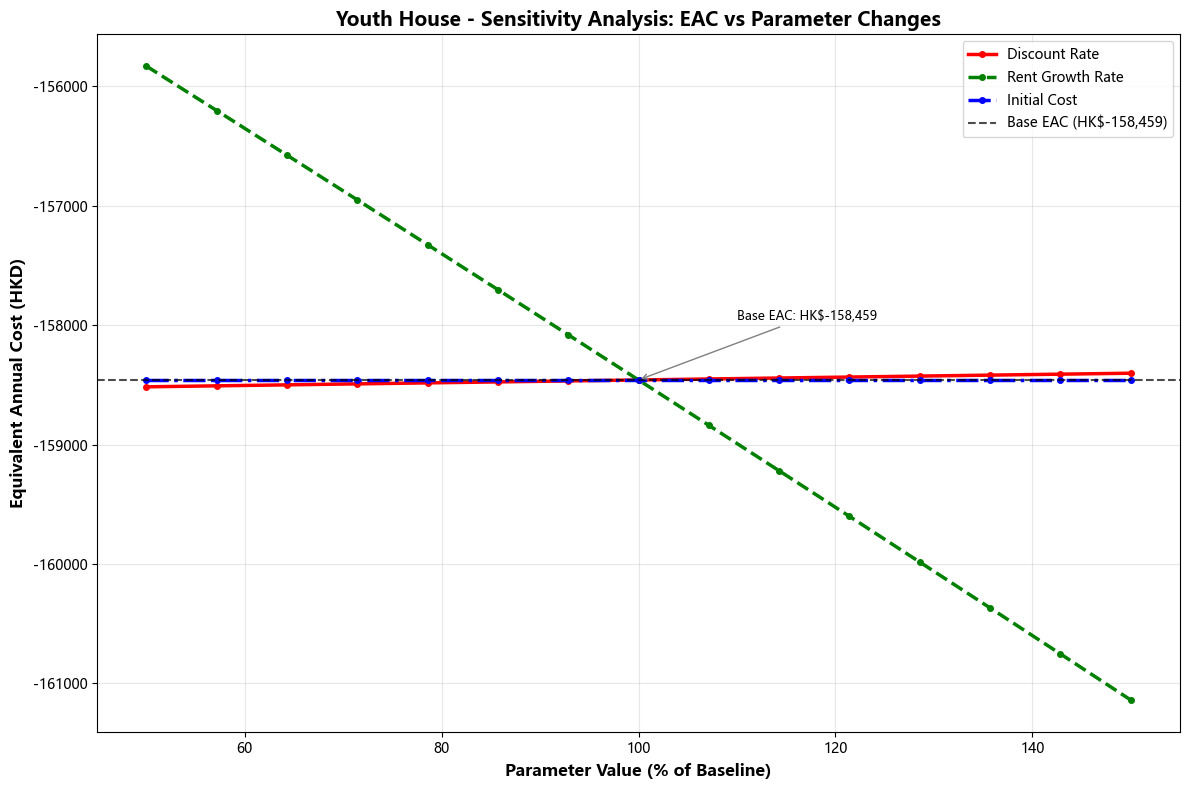

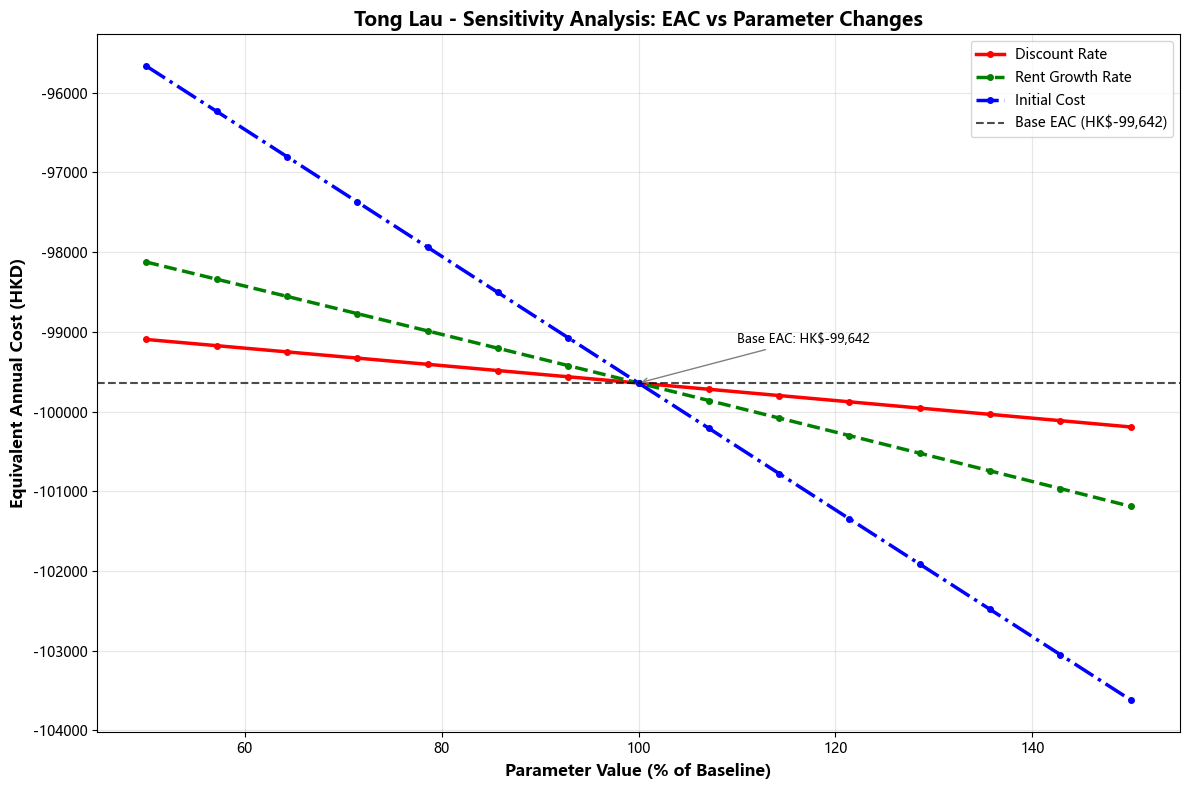

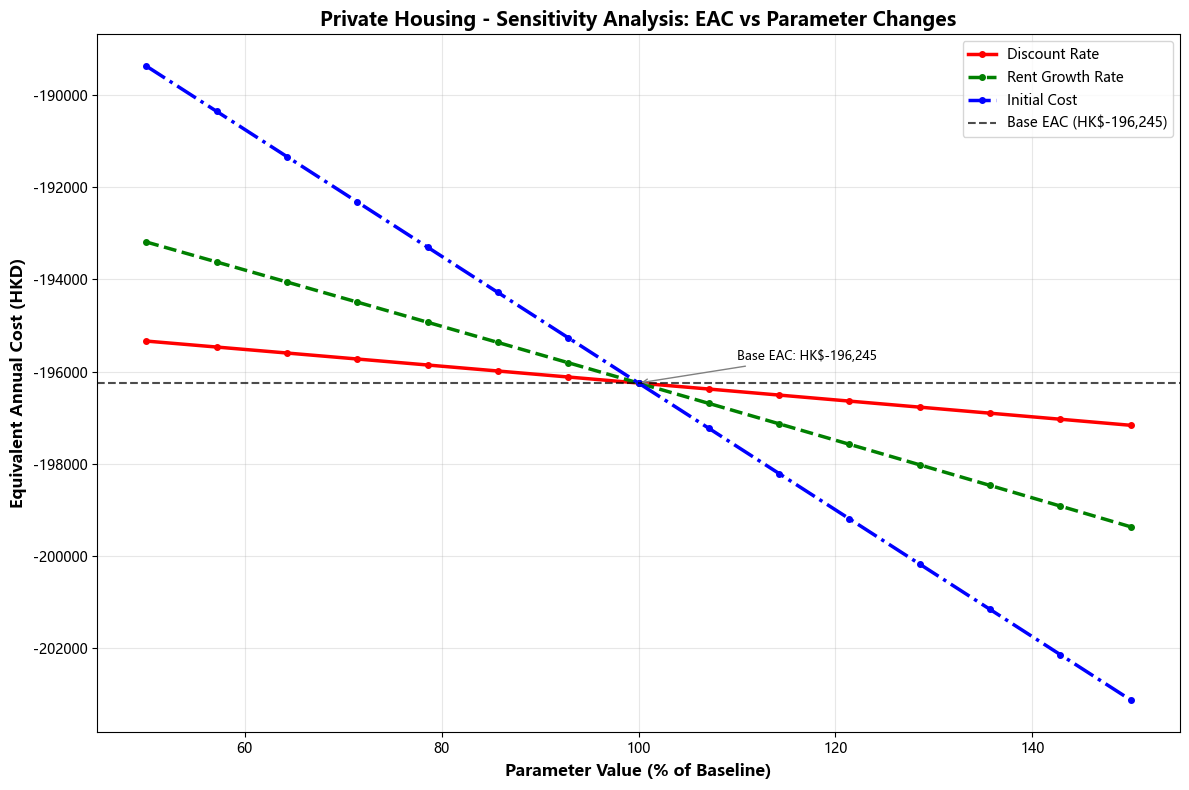

SENSITIVITY ANALYSIS RESULTS - EQUIVALENT ANNUAL COST

Youth House Option:
------------------------------------------------------------
Base Case EAC: HK$-158,459

Discount Rate:
 50.0%: EAC = HK$-158,517 (+0.0%)
 150.0%: EAC = HK$-158,403 (-0.0%)
 Impact: HK$114 (Range: 114)

Rent Growth Rate:
 50.0%: EAC = HK$-155,830 (-1.7%)
 150.0%: EAC = HK$-161,140 (+1.7%)
 Impact: HK$-5,310 (Range: 5,310)

Initial Cost:
 50.0%: EAC = HK$-158,459 (-0.0%)
 150.0%: EAC = HK$-158,459 (-0.0%)
 Impact: HK$0 (Range: 0)

Tong Lau Option:
------------------------------------------------------------
Base Case EAC: HK$-99,642

Discount Rate:
 50.0%: EAC = HK$-99,096 (-0.5%)
 150.0%: EAC = HK$-100,194 (+0.6%)
 Impact: HK$-1,098 (Range: 1,098)

Rent Growth Rate:
 50.0%: EAC = HK$-98,124 (-1.5%)
 150.0%: EAC = HK$-101,190 (+1.6%)
 Impact: HK$-3,066 (Range: 3,066)

Initial Cost:
 50.0%: EAC = HK$-95,665 (-4.0%)
 150.0%: EAC = HK$-103,620 (+4.0%)
 Impact: HK$-7,955 (Range: 7,955)

Private Housing Option:
------

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import numpy_financial as nf
import pandas as pd

plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei']
plt.rcParams['axes.unicode_minus'] = False

# Base data
discount_rate = 0.04

def calculate_npv(cash_flows, dr):
    npv = 0
    for year, cf in enumerate(cash_flows):
        npv += cf / ((1 + dr) ** year)
    return npv

def calculate_eac(npv, years, dr):
    annuity_factor = (1 - (1 + dr) ** -years) / dr
    return npv / annuity_factor

# Base case cash flows
youth_house_cf = [0, -155640, -155731, -160407, -160501, -160596]
tong_lau_cf = [-35416, -92400, -92491, -99174, -97939., -75349]
private_housing_cf = [-61185, -180000, -180091, -202522, -198112, -150249]

# Base initial costs for each option
base_initial_costs = {
    "Youth House": 0,
    "Tong Lau": 35416,
    "Private Housing": 61185
}

def create_sensitivity_analysis_eac():
    """Create sensitivity analysis line charts for EAC following sparkyplot structure"""

    cases = {
        "Youth House": youth_house_cf,
        "Tong Lau": tong_lau_cf, 
        "Private Housing": private_housing_cf
    }

    case_colors = {
        "Youth House": "#FF6B6B",
        "Tong Lau": "#4ECDC4", 
        "Private Housing": "#45B7D1"
    }

    # Parameters to analyze - removed inflation rate, added initial cost
    parameters = {
        'Discount Rate': {'base': 0.04, 'range': (50, 150)},
        'Rent Growth Rate': {'base': 0.03, 'range': (50, 150)},
        'Initial Cost': {'base': 1.0, 'range': (50, 150)}  # Base is 100%, range 50%-150%
    }

    # Generate sensitivity data for each case and parameter
    sensitivity_data = {}

    for case_name, base_cash_flow in cases.items():
        case_sensitivity = {}

        for param_name, param_data in parameters.items():
            base_value = param_data['base']
            low_pct, high_pct = param_data['range']

            # Create percentage range for this parameter
            percentages = np.linspace(low_pct, high_pct, 15)
            eac_values = []

            for pct in percentages:
                current_value = base_value * (pct / 100)

                if param_name == 'Discount Rate':
                    # Vary discount rate
                    npv = calculate_npv(base_cash_flow, current_value)
                    eac = calculate_eac(npv, 5, current_value)

                elif param_name == 'Rent Growth Rate':
                    # Vary rent growth rate
                    adjusted_cf = base_cash_flow.copy()
                    for year in [3, 4, 5]:
                        # Calculate the growth from year 2 to current year
                        years_from_base = year - 2
                        growth_factor = (1 + current_value) ** years_from_base

                        if case_name == "Youth House":
                            base_rent_year2 = -149640  # Rent in year 2
                        elif case_name == "Tong Lau":
                            base_rent_year2 = -86400
                        else:  # private housing
                            base_rent_year2 = -174000

                        # Apply growth to rent component
                        rent_component = base_rent_year2 * growth_factor

                        # Keep utility component the same as base case
                        # Extract utility from base case (total cost - base rent)
                        base_rent_at_year = base_rent_year2 * (1 + 0.03) ** years_from_base  # Use base 3% growth
                        utility_component = base_cash_flow[year] - base_rent_at_year

                        adjusted_cf[year] = rent_component + utility_component

                    npv = calculate_npv(adjusted_cf, discount_rate)
                    eac = calculate_eac(npv, 5, discount_rate)

                else:  # Initial Cost
                    # Vary initial cost
                    adjusted_cf = base_cash_flow.copy()
                    # Apply the percentage change to initial cost (Year 0)
                    base_initial_cost = base_initial_costs[case_name]
                    adjusted_initial_cost = base_initial_cost * (pct / 100)
                    adjusted_cf[0] = -adjusted_initial_cost  # Negative because it's a cost
                    
                    npv = calculate_npv(adjusted_cf, discount_rate)
                    eac = calculate_eac(npv, 5, discount_rate)

                eac_values.append(eac)

            case_sensitivity[param_name] = (percentages, eac_values)

        sensitivity_data[case_name] = case_sensitivity

    # Create line charts for each case
    for case_name, case_data in sensitivity_data.items():
        fig, ax = plt.subplots(figsize=(12, 8))

        # Plot each parameter
        colors = ['red', 'green', 'blue']
        line_styles = ['-', '--', '-.']

        for i, (param_name, (percentages, eac_values)) in enumerate(case_data.items()):
            ax.plot(percentages, eac_values,
                   label=param_name,
                   color=colors[i],
                   linestyle=line_styles[i],
                   linewidth=2.5,
                   marker='o',
                   markersize=4)

        # Calculate and add baseline reference line
        base_npv = calculate_npv(cases[case_name], discount_rate)
        base_eac = calculate_eac(base_npv, 5, discount_rate)
        ax.axhline(y=base_eac, color='black', linestyle='--', alpha=0.7,
                  label=f'Base EAC (HK${base_eac:,.0f})')

        # Customize the chart
        ax.set_xlabel('Parameter Value (% of Baseline)', fontsize=12, fontweight='bold')
        ax.set_ylabel('Equivalent Annual Cost (HKD)', fontsize=12, fontweight='bold')
        ax.set_title(f'{case_name} - Sensitivity Analysis: EAC vs Parameter Changes', 
                    fontsize=14, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.legend(loc='best', fontsize=10)

        # Add annotation for baseline
        ax.annotate(f'Base EAC: HK${base_eac:,.0f}',
                   xy=(100, base_eac),
                   xytext=(110, base_eac + 500),
                   arrowprops=dict(arrowstyle='->', color='gray'),
                   fontsize=9)

        plt.tight_layout()
        plt.show()

    # Print detailed results at limit points
    print("SENSITIVITY ANALYSIS RESULTS - EQUIVALENT ANNUAL COST")
    print("=" * 80)

    for case_name, case_data in sensitivity_data.items():
        print(f"\n{case_name} Option:")
        print("-" * 60)

        base_npv = calculate_npv(cases[case_name], discount_rate)
        base_eac = calculate_eac(base_npv, 5, discount_rate)
        print(f"Base Case EAC: HK${base_eac:,.0f}")

        for param_name, (percentages, eac_values) in case_data.items():
            low_pct = percentages[0]
            high_pct = percentages[-1]
            low_eac = eac_values[0]
            high_eac = eac_values[-1]
            impact = high_eac - low_eac

            low_pct_change = (low_eac - base_eac) / base_eac * 100
            high_pct_change = (high_eac - base_eac) / base_eac * 100

            print(f"\n{param_name}:")
            print(f" {low_pct}%: EAC = HK${low_eac:,.0f} ({low_pct_change:+.1f}%)")
            print(f" {high_pct}%: EAC = HK${high_eac:,.0f} ({high_pct_change:+.1f}%)")
            print(f" Impact: HK${impact:,.0f} (Range: {abs(impact):,.0f})")
            
# Run the analysis
create_sensitivity_analysis_eac()